In [22]:
import csv
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

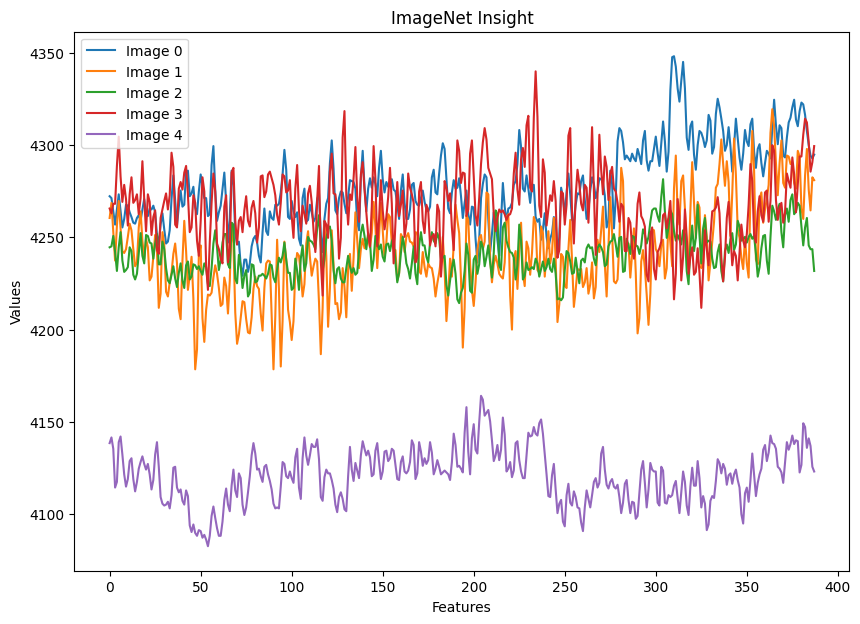

In [23]:
csv_data = list(csv.reader(open('../Datasets/MindBigData-Imagenet/MindBigData_Imagenet_Insight_n00007846_112420_1_1479.csv', 'r')))

# data = np.zeros((len(csv_data), len(csv_data[0])-1))
# for i in range(len(data)):
#     data[i] = csv_data[i][1:]
data = np.array(csv_data)[:,1:].astype(float)

# plot 
plt.figure(figsize=(10, 7))
for i in range(len(data)):
    plt.plot(data[i], label='Image '+str(i))
plt.legend()
plt.title('ImageNet Insight')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [25]:
path = '../Datasets/MindBigData-Imagenet'
len(os.listdir(path))
data = []
for item in tqdm(os.listdir(path)):
    path_i = os.path.join(path, item)
    csv_data = list(csv.reader(open(path_i, 'r')))
    np_data = np.array(csv_data)[:,1:].astype(float)
    data.append(np_data)
    # close file
    csv_data = None
data = np.array(data)
data.shape

100%|██████████| 14012/14012 [00:39<00:00, 358.94it/s]
C:\Users\joeag\AppData\Local\Temp\ipykernel_11296\3235878160.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


ValueError: could not broadcast input array from shape (5,388) into shape (5,)

In [31]:
min_len = 100000
for d in data:
    min_len = min(min_len, d.shape[1])
min_len
# truncate data
for i in range(len(data)):
    data[i] = data[i][:,:min_len]
data = np.array(data)
data.shape

(14012, 5, 360)